<a href="https://colab.research.google.com/github/maxwellfundi/AI-Course-2024/blob/main/LSTM_for_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Define the column data types
column_types = {
    'Global_active_power': 'float64',
    'Global_reactive_power': 'float64',
    'Voltage': 'float64',
    'Global_intensity': 'float64',
    'Sub_metering_1': 'float64',
    'Sub_metering_2': 'float64',
    'Sub_metering_3': 'float64'
}

In [ ]:
# Load the dataset and specify column data types and na_values
data = pd.read_csv('household_power_consumption.txt', delimiter=';', dtype=column_types, na_values='?')
data


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
913879,11/9/2008,08:43:00,1.378,0.288,239.07,5.8,0.0,1.0,18.0
913880,11/9/2008,08:44:00,1.414,0.316,239.07,6.0,0.0,2.0,19.0
913881,11/9/2008,08:45:00,1.402,0.312,239.04,6.0,0.0,0.0,18.0
913882,11/9/2008,08:46:00,1.380,0.274,239.47,5.8,0.0,0.0,18.0


In [ ]:
# Drop rows with missing values
data = data.dropna()

# Drop the 'Date' and 'Time' columns
data = data.drop(columns=['Date', 'Time'])

# Transform the dataset to include variables at (t-1) and (t)
shifted_data = data.shift(1)
shifted_data.columns = [f'{col}_t-1' for col in shifted_data.columns]
shifted_data['Global_active_power_t'] = data['Global_active_power']
shifted_data = shifted_data.dropna()
shifted_data


,Global_active_power_t-1,Global_reactive_power_t-1,Voltage_t-1,Global_intensity_t-1,Sub_metering_1_t-1,Sub_metering_2_t-1,Sub_metering_3_t-1,Global_active_power_t
1,4.216,0.418,234.84,18.4,0.0,1.0,17.0,5.360
2,5.360,0.436,233.63,23.0,0.0,1.0,16.0,5.374
3,5.374,0.498,233.29,23.0,0.0,2.0,17.0,5.388
4,5.388,0.502,233.74,23.0,0.0,1.0,17.0,3.666
5,3.666,0.528,235.68,15.8,0.0,1.0,17.0,3.520
...,...,...,...,...,...,...,...,...
913878,1.376,0.286,238.77,5.8,0.0,1.0,18.0,1.382
913879,1.382,0.290,239.40,5.8,0.0,1.0,18.0,1.378
913880,1.378,0.288,239.07,5.8,0.0,1.0,18.0,1.414
913881,1.414,0.316,239.07,6.0,0.0,2.0,19.0,1.402


In [ ]:
# Split the data into train and test subsets
X = shifted_data.drop(columns=['Global_active_power_t'])
y = shifted_data['Global_active_power_t']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train_scaled",X_train_scaled.shape)
print("X_test_scaled",X_test_scaled.shape)

X_train_scaled (727948, 7)
X_test_scaled (181987, 7)


In [ ]:
# Reshape the input data for LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
print("X_train_scaled",X_train_scaled.shape)
print("X_test_scaled",X_test_scaled.shape)

X_train_scaled (727948, 1, 7)
X_test_scaled (181987, 1, 7)


In [ ]:
# Create the LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(100, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(tf.keras.layers.Dense(1))

print("X_train_scaled.shape[1]",X_train_scaled.shape[1])
print("X_train_scaled.shape[2]",X_train_scaled.shape[2])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


X_train_scaled.shape[1] 1
X_train_scaled.shape[2] 7


In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=3, batch_size=64, validation_data=(X_test_scaled, y_test), verbose=2)

# Make predictions
y_pred = model.predict(X_test_scaled)

Epoch 1/3
11375/11375 - 57s - 5ms/step - loss: 0.1040 - val_loss: 0.0815
Epoch 2/3
11375/11375 - 85s - 7ms/step - loss: 0.0831 - val_loss: 0.0807
Epoch 3/3
11375/11375 - 78s - 7ms/step - loss: 0.0828 - val_loss: 0.0802
5688/5688 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


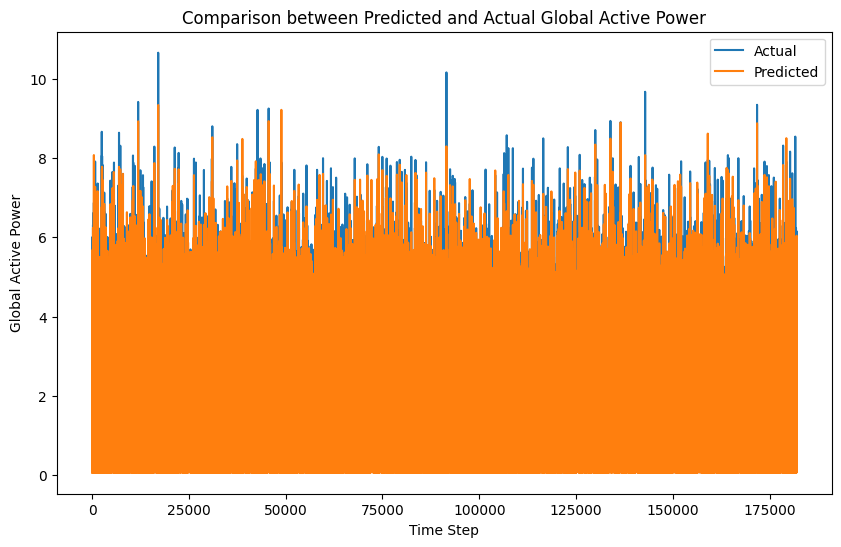

In [ ]:
# Visualize the comparison between predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Comparison between Predicted and Actual Global Active Power')
plt.xlabel('Time Step')
plt.ylabel('Global Active Power')
plt.show()